In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# %load_ext tensorboard

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "deep"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
def logit(z):
    return 1 / (1 + np.exp(-z))

(-5.0, 5.0, -0.2, 1.2)

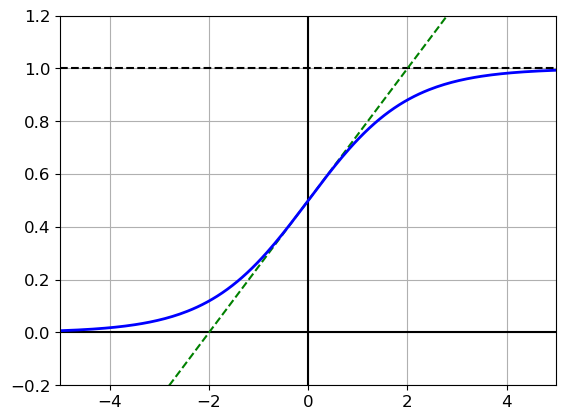

In [3]:
z = np.linspace(-5, 5, 200)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [1, 1], 'k--')
plt.plot([0, 0], [-0.2, 1.2], 'k-')
plt.plot([-5, 5], [-3/4, 7/4], 'g--')
plt.plot(z, logit(z), 'b-', linewidth=2)
plt.grid(True)
plt.axis([-5, 5, -0.2, 1.2])

### Xavier 초기화와 He 초기화

In [4]:
[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [5]:
keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal')

In [6]:
init = keras.initializers.VarianceScaling(scale=2, mode='fan_avg',
                                          distribution='uniform')
keras.layers.Dense(10, activation='relu', kernel_initializer=init)

### 수렴하지 않는 활성화 함수
### LeakyReLU

In [7]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha * z, z)

(-5.0, 5.0, -0.5, 4.2)

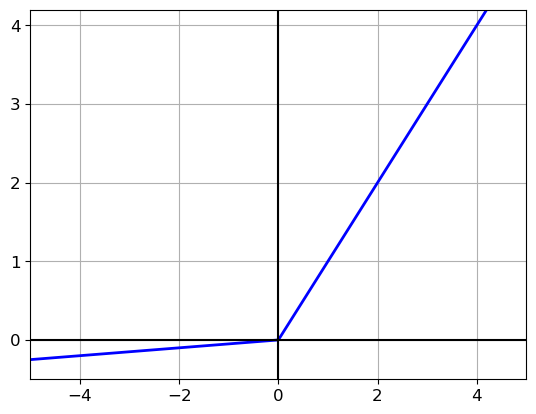

In [8]:
plt.plot(z, leaky_relu(z, 0.05), 'b-', linewidth=2)
plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')
plt.grid(True)
plt.axis([-5, 5, -0.5, 4.2])

In [9]:
[m for m in dir(keras.activations) if not m.startswith('_')]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'mish',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [10]:
[m for m in dir(keras.layers) if 'relu' in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [12]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer='he_normal'),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [14]:
# history = model.fit(X_train, y_train, epochs=10,
#                     validation_data=(X_valid, y_valid))

In [15]:
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])

In [17]:
# history = model.fit(X_train, y_train, epochs=10,
#                     validation_data=(X_valid, y_valid))

### ELU

In [18]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

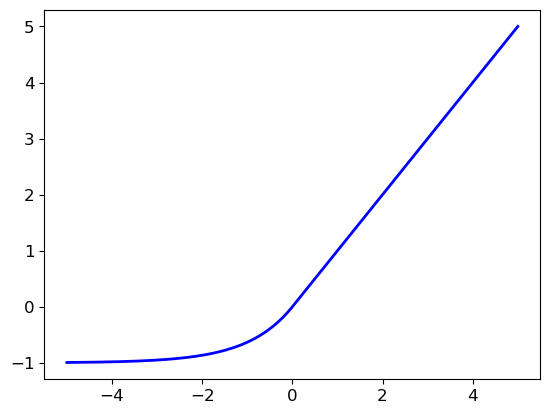

In [19]:
plt.plot(z, elu(z), 'b-', linewidth=2)

In [20]:
keras.layers.Dense(10, activation='elu')

### SELU

In [21]:
keras.layers.Dense(10, activation='selu',
                   kernel_initializer='lecun_normal')

In [22]:
np.random.seed(42)
tf.random.set_seed(42)

In [23]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='selu',
                             kernel_initializer='lecun_normal'))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation='selu',
                                 kernel_initializer='lecun_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [24]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [25]:
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [26]:
# history = model.fit(X_train_scaled, y_train, epochs=5,
#                     validation_data=(X_valid_scaled, y_valid))

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [29]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [30]:
# history = model.fit(X_train_scaled, y_train, epochs=5,
#                     validation_data=(X_valid_scaled, y_valid))

### 배치 정규화

In [31]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 batch_normalization (Batch  (None, 784)               3136      
 Normalization)                                                  
                                                                 
 dense_212 (Dense)           (None, 300)               235500    
                                                                 
 batch_normalization_1 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_213 (Dense)           (None, 100)               30100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [33]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [34]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [35]:
# history = model.fit(X_train, y_train, epochs=10,
#                     validation_data=(X_valid, y_valid))

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [37]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])

In [38]:
# history = model.fit(X_train, y_train, epochs=10,
#                     validation_data=(X_valid, y_valid))

### 그레이디언트 클리핑

In [39]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

### 사전 훈련된 층 재사용하기

In [40]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6)
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2
    y_B = (y[y_5_or_6] == 6).astype(np.float32)
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

In [41]:
X_train_A.shape

(43986, 28, 28)

In [42]:
X_train_B.shape

(200, 28, 28)

In [43]:
y_train_A[:30]

array([4, 0, 5, 7, 7, 7, 4, 4, 3, 4, 0, 1, 6, 3, 4, 3, 2, 6, 5, 3, 4, 5,
       1, 3, 4, 2, 0, 6, 7, 1], dtype=uint8)

In [44]:
y_train_B[:30]

array([1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1.], dtype=float32)

In [45]:
tf.random.set_seed(42)
np.random.seed(42)

In [46]:
model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation='selu'))
model_A.add(keras.layers.Dense(8, activation='softmax'))

In [47]:
model_A.compile(loss='sparse_categorical_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

In [48]:
# history = model_A.fit(X_train_A, y_train_A, epochs=20,
#                       validation_data=(X_valid_A, y_valid_A))

In [49]:
model_A.save('my_model_A.h5')

/Users/taemin/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation='selu'))
model_B.add(keras.layers.Dense(1, activation='sigmoid'))

In [51]:
model_B.compile(loss='binary_crossentropy',
                optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                metrics=['accuracy'])

In [52]:
history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20


7/7 [==============================] - 0s 18ms/step - loss: 0.6167 - accuracy: 0.7200 - val_loss: 0.5647 - val_accuracy: 0.7191
Epoch 2/20
7/7 [==============================] - 0s 6ms/step - loss: 0.4635 - accuracy: 0.7900 - val_loss: 0.4498 - val_accuracy: 0.8124
Epoch 3/20
7/7 [==============================] - 0s 6ms/step - loss: 0.3596 - accuracy: 0.8850 - val_loss: 0.3778 - val_accuracy: 0.8671
Epoch 4/20
7/7 [==============================] - 0s 6ms/step - loss: 0.2955 - accuracy: 0.9300 - val_loss: 0.3262 - val_accuracy: 0.9026
Epoch 5/20
7/7 [==============================] - 0s 6ms/step - loss: 0.2489 - accuracy: 0.9600 - val_loss: 0.2886 - val_accuracy: 0.9199
Epoch 6/20
7/7 [==============================] - 0s 6ms/step - loss: 0.2148 - accuracy: 0.9750 - val_loss: 0.2591 - val_accuracy: 0.9351
Epoch 7/20
7/7 [==============================] - 0s 6ms/step - loss: 0.1896 - accuracy: 0.9800 - val_loss: 0.2365 - val_accuracy: 0.9422
Epoch 8/20
7/7 [============================

In [53]:
model_B.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_224 (Dense)           (None, 300)               235500    
                                                                 
 dense_225 (Dense)           (None, 100)               30100     
                                                                 
 dense_226 (Dense)           (None, 50)                5050      
                                                                 
 dense_227 (Dense)           (None, 50)                2550      
                                                                 
 dense_228 (Dense)           (None, 50)                2550      
                                                                 
 dense_229 (Dense)           (None, 1)                

In [54]:
model_A = keras.models.load_model('my_model_A.h5')
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation='sigmoid'))

In [55]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [56]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss='binary_crossentropy',
                     optimizer=keras.optimizers.SGD(learning_rate=1e-3),
                     metrics=['accuracy'])

In [57]:
# history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
#                            validation_data=(X_valid_B, y_valid_B))

# for layer in model_B_on_A.layers[:-1]:
#     layer.trainable = True

# model_B_on_A.compile(loss='binary_crossentropy',
#                      optimizer=keras.optimizers.SGD(learning_rate=1e-3),
#                      metrics=['accuracy'])
# history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
#                            validation_data=(X_valid_B, y_valid_B))

In [58]:
model_B.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 691us/step - loss: 0.1111 - accuracy: 0.9770


[0.11108828336000443, 0.9769999980926514]

In [59]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 719us/step - loss: 0.9656 - accuracy: 0.3195


[0.9656099677085876, 0.31949999928474426]

### 고속 옵티마이저

In [60]:
keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

In [61]:
keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

In [62]:
keras.optimizers.Adagrad(learning_rate=0.001)

In [63]:
keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [64]:
keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [65]:
keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [66]:
keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

### 학습률 스케줄링

In [67]:
optimizer = tf.keras.optimizers.legacy.SGD(learning_rate=0.01, decay=1e-4)

In [68]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [69]:
# n_epochs = 25
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [70]:
def exponential_decay_fn(epoch):
    return 0.01 * 0.1**(epoch / 20)

In [71]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [72]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
n_epochs = 25

In [73]:
# lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid),
#                     callbacks=[lr_scheduler])

In [74]:
K = keras.backend

class ExponentialDecay(keras.callbacks.Callback):
    def __init__(self, s=40000):
        super().__init__()
        self.s = s
    
    def on_batch_begin(self, batch, logs=None):
        lr = K.get_value(self.model.optimizer.lr)
        K.set_value(self.model.optimizer.lr, lr * 0.1**(1 / s))
    
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        logs['lr'] = K.get_value(self.model.optimizer.lr)

In [75]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.Dense(10, activation='softmax')
])
lr0 = 0.01
optimizer = keras.optimizers.Nadam(lr=lr0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
n_epochs = 25

In [76]:
# s = 20 * len(X_train) // 32
# exp_decay = ExponentialDecay(s)
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid),
#                     callbacks=[exp_decay])

In [77]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [78]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [79]:
# lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
#     keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
#     keras.layers.Dense(10, activation="softmax")
# ])
# model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 25
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid),
#                     callbacks=[lr_scheduler])

In [80]:
tf.random.set_seed(42)
np.random.seed(42)

In [81]:
# lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
#     keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
#     keras.layers.Dense(10, activation="softmax")
# ])

# optimizer = keras.optimizers.SGD(lr=0.02, momentum=0.9)
# model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# n_epochs = 25
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid),
#                     callbacks=[lr_scheduler])

In [82]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
#     keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
#     keras.layers.Dense(10, activation="softmax")
# ])
# s = 20 * len(X_train) // 32
# learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
# optimizer = keras.optimizers.SGD(learning_rate)
# model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
# n_epochs = 25
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

### 규제를 사용해 과대적합 피하기

In [83]:
layer = keras.layers.Dense(100, activation='elu',
                           kernel_initializer='he_normal',
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [84]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dense(300, activation='elu',
#                        kernel_initializer='he_normal',
#                        kernel_regularizer=keras.regularizers.l2(0.01)),
#     keras.layers.Dense(100, activation='elu',
#                        kernel_initializer='he_normal',
#                        kernel_regularizer=keras.regularizers.l2(0.01)),
#     keras.layers.Dense(10, activation='softmax',
#                        kernel_regularizer=keras.regularizers.l2(0.01))
# ])
# model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [85]:
# from functools import partial

# RegularizedDense = partial(keras.layers.Dense,
#                            activation='elu',
#                            kernel_initializer='he_normal',
#                            kernel_regularizer=keras.regularizers.l2(0.01))

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     RegularizedDense(300),
#     RegularizedDense(100),
#     RegularizedDense(10, activation='softmax')
# ])
# model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

### 드롭아웃

In [86]:
# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28]),
#     keras.layers.Dropout(rate=0.2),
#     keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
#     keras.layers.Dropout(rate=0.2),
#     keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
#     keras.layers.Dropout(rate=0.2),
#     keras.layers.Dense(10, activation="softmax")
# ])
# model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
# n_epochs = 2
# history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
#                     validation_data=(X_valid_scaled, y_valid))

In [87]:
tf.random.set_seed(42)
np.random.seed(42)

In [88]:
y_probas = np.stack([model(X_test_scaled, training=True)
                     for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [89]:
np.round(model.predict(X_test_scaled[:1]), 2)

1/1 [==============================] - 0s 36ms/step


array([[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],
      dtype=float32)

In [90]:
np.round(y_probas[:, :1], 2)

array([[[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],

       [[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0

In [91]:
np.round(y_proba[:1], 2)

array([[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],
      dtype=float32)

In [92]:
y_std = y_probas.std(axis=0)
np.round(y_std[:1], 2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [93]:
y_pred = np.argmax(y_proba, axis=1)

In [94]:
accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.1066

In [95]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [96]:
tf.random.set_seed(42)
np.random.seed(42)

In [97]:
mc_model = keras.models.Sequential([
    MCDropout(layer.rate) if isinstance(layer, keras.layers.Dropout) else layer
    for layer in model.layers
])

In [98]:
mc_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_237 (Dense)           (None, 300)               235500    
                                                                 
 dense_238 (Dense)           (None, 100)               30100     
                                                                 
 dense_239 (Dense)           (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
mc_model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [101]:
mc_model.set_weights(model.get_weights())

In [102]:
np.round(np.mean([mc_model.predict(X_test_scaled[:1]) for sample in range(100)], axis=0), 2)

1/1 [==============================] - 0s 10ms/step


array([[0.2 , 0.02, 0.2 , 0.03, 0.11, 0.25, 0.06, 0.03, 0.03, 0.08]],
      dtype=float32)

In [103]:
layer = keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal',
                           kernel_constraint=keras.constraints.max_norm(1.))

In [104]:
from functools import partial
MaxNormDense = partial(keras.layers.Dense,
                       activation='selu', kernel_initializer='lecun_normal',
                       kernel_constraint=keras.constraints.max_norm(1.))
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation='softmax')
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
n_epochs = 2

In [105]:
history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4750 - accuracy: 0.8338 - val_loss: 0.3641 - val_accuracy: 0.8714
Epoch 2/2
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3530 - accuracy: 0.8710 - val_loss: 0.3735 - val_accuracy: 0.8608


## 연습문제
### a

In [106]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [107]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation='elu',
                                 kernel_initializer='he_normal'))

In [108]:
# b
model.add(keras.layers.Dense(10, activation='softmax'))

In [109]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [110]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

170498071/170498071 [==============================] - 48s 0us/step


In [112]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('my_cifar10_model.h5', save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, 'my_cifar10_logs', 'run_{:03d}'.format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [114]:
%load_ext tensorboard

In [118]:
%tensorboard --logdir=./my_cifar10_logs --port=6006

Reusing TensorBoard on port 6006 (pid 12115), started 0:07:27 ago. (Use '!kill 12115' to kill it.)

In [117]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 9s 5ms/step - loss: 4.1739 - accuracy: 0.1568 - val_loss: 2.1921 - val_accuracy: 0.2088
Epoch 2/100
  23/1407 [..............................] - ETA: 6s - loss: 2.2325 - accuracy: 0.1984

/Users/taemin/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 [==============================] - 7s 5ms/step - loss: 2.0822 - accuracy: 0.2288 - val_loss: 2.2291 - val_accuracy: 0.1994
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9655 - accuracy: 0.2726 - val_loss: 1.9904 - val_accuracy: 0.2636
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8910 - accuracy: 0.3024 - val_loss: 2.0011 - val_accuracy: 0.2902
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 1.8217 - accuracy: 0.3381 - val_loss: 1.8401 - val_accuracy: 0.3308
Epoch 6/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.7597 - accuracy: 0.3636 - val_loss: 1.7582 - val_accuracy: 0.3580
Epoch 7/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.7162 - accuracy: 0.3798 - val_loss: 1.7414 - val_accuracy: 0.3570
Epoch 8/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.6785 - accuracy: 0.3943 - val_loss: 1.6732 - val_accuracy: 0.39

In [119]:
model = keras.models.load_model('my_cifar10_model.h5')
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 1.5199 - accuracy: 0.4712


[1.5199028253555298, 0.47119998931884766]

In [121]:
# c
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer='he_normal'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation='softmax'))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('my_cifar10_bn_model.h5', save_best_only=True)
run_index = 1
run_logdir = os.path.join(os.curdir, 'my_cifar10_logs', 'run_bn_{:03d}'.format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [122]:
model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 16s 9ms/step - loss: 1.8357 - accuracy: 0.3436 - val_loss: 1.6560 - val_accuracy: 0.4132
Epoch 2/100
   8/1407 [..............................] - ETA: 11s - loss: 1.7158 - accuracy: 0.3711

/Users/taemin/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1407/1407 [==============================] - 13s 9ms/step - loss: 1.6618 - accuracy: 0.4054 - val_loss: 1.5911 - val_accuracy: 0.4350
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5968 - accuracy: 0.4321 - val_loss: 1.5796 - val_accuracy: 0.4216
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5514 - accuracy: 0.4480 - val_loss: 1.5229 - val_accuracy: 0.4614
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5114 - accuracy: 0.4649 - val_loss: 1.4458 - val_accuracy: 0.4878
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4695 - accuracy: 0.4792 - val_loss: 1.4436 - val_accuracy: 0.4886
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4374 - accuracy: 0.4879 - val_loss: 1.4102 - val_accuracy: 0.4956
Epoch 8/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4090 - accuracy: 0.5012 - val_loss: 1.3769 - val_accurac

In [123]:
model = keras.models.load_model('my_cifar10_bn_model.h5')
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.3060 - accuracy: 0.5514


[1.305954098701477, 0.5514000058174133]

In [132]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer='lecun_normal',
                                 activation='selu'))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation='softmax'))

In [133]:
optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 # 모델을 훈련할 때마다 증가시킴
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [134]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

In [135]:
model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model('my_cifar10_selu_model.h5')
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 9s 5ms/step - loss: 1.9632 - accuracy: 0.2910 - val_loss: 1.8360 - val_accuracy: 0.3216
Epoch 2/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.7829 - accuracy: 0.3582 - val_loss: 1.8421 - val_accuracy: 0.3406
Epoch 3/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.6927 - accuracy: 0.3954 - val_loss: 1.8173 - val_accuracy: 0.3756
Epoch 4/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.6389 - accuracy: 0.4183 - val_loss: 1.7328 - val_accuracy: 0.3984
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5956 - accuracy: 0.4332 - val_loss: 1.7413 - val_accuracy: 0.3900
Epoch 6/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5574 - accuracy: 0.4491 - val_loss: 1.6221 - val_accuracy: 0.4246
Epoch 7/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.5153 - accuracy: 0.4639 - val_loss: 1.6279 - val_ac

[1.5329430103302002, 0.4781999886035919]

In [136]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [137]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer
    for layer in model.layers
])

In [138]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [139]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

157/157 [==============================] - 0s 1ms/step


0.4782